In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [69]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
#Using inspector to explore columns name
inspector = inspect(engine)

In [14]:
# Exploring the columns names in measurement class
for c in inspector.get_columns("measurement"):
    print(c["name"],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Exploring the columns names in station class
for c in inspector.get_columns("station"):
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [154]:
# Calculate the date 1 year ago from the last data point in the database
# First we retrieve the very last date in the class
print (session.query(measurement.date).order_by(desc(measurement.date)).first())
#From that starting point we retrieve the last 12 months with precipitation

# Perform a query to retrieve the date and precipitation scores
session.query(measurement.date, measurement.prcp).filter(measurement.date>'2016-08-22', measurement.prcp!=0).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(measurement.date, measurement.prcp).filter(measurement.date>'2016-08-22', measurement.prcp!=0).all()
date_ls=[]
prcp_ls=[]
for x in results:
    date_ls.append(x.date)
    prcp_ls.append(x.prcp)
# Sort the dataframe by date    
prcp_df = pd.DataFrame({'Date':date_ls,'Prcp':prcp_ls}).set_index('Date').sort_values('Date')
prcp_df.to_csv('tests.csv')

('2017-08-23',)


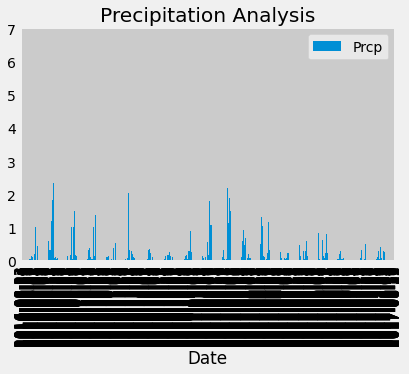

In [164]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind="bar", title="Precipitation Analysis")


#x_values = prcp_df.index.values
#y_values = prcp_df['Prcp'].values
#plt.bar(x_values, y_values)
#plt.xticks(rotation=90)

#plt.figure();
#prcp_df['Prcp'].diff().hist()

plt.show()

In [153]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [53]:
# Design a query to show how many stations are available in this dataset?
session.query(station).count()

9

In [208]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#Option #1 - using an iterable
query = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station)))
for row in query:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [210]:
#Alternatively using .all() instead of an iterable
(
    session
    .query(measurement.station, func.count(measurement.station))
    .group_by(measurement.station)
    .order_by(desc(func.count(measurement.station)))
    .all()
)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [214]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
(
    session
    .query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))
    .filter(measurement.station=='USC00519281')
    .all()
)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [216]:
# Choose the station with the highest number of temperature observations.
(
    session
    .query(measurement.station, func.count(measurement.tobs))
    .group_by(measurement.station)
    .order_by(desc(func.count(measurement.tobs)))
    .all()
)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [218]:
# Query the last 12 months of temperature observation data for this station 
(
    session
    .query(measurement.date, measurement.tobs)
    .filter(measurement.date>'2016-08-22', measurement.tobs!=0)
    .filter(measurement.station=='USC00519281')
    .all()
)

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

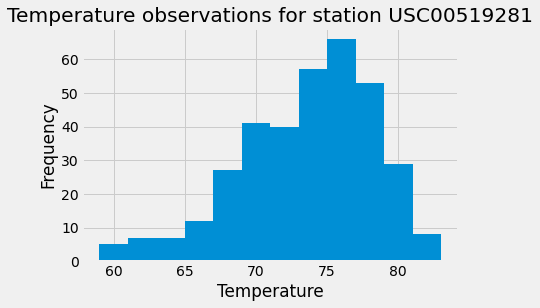

,Tobs
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0


In [235]:
# Plot the results as a histogram with bins=12
#using an iterable to create a dataframe base on the query from prior cell
results = session.query(measurement.date, measurement.tobs).filter(measurement.date>'2016-08-22', measurement.tobs!=0).filter(measurement.station=='USC00519281')
date_ls=[]
tobs_ls=[]
for x in results:
    date_ls.append(x.date)
    tobs_ls.append(x.tobs)
# Sort the dataframe by date    
tobs_df = pd.DataFrame({'Date':date_ls,'Tobs':tobs_ls}).set_index('Date').sort_values('Date')

plt.hist(tobs_df['Tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature observations for station USC00519281')
plt.show()

tobs_df.head(3)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
